# 0. Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

# 1. Dataset

### Dataset importing

dataset source: https://insideairbnb.com/get-the-data/

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('data_sheets/listings.csv.gz')
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,43405674,https://www.airbnb.com/rooms/43405674,20230716032810,2023-07-16,previous scrape,Rental unit in Dallas · 1 bedroom · 1 bed · 1 ...,NaN,NaN,https://a0.muscache.com/pictures/ebdfe3ad-cd11...,263895932,https://www.airbnb.com/users/show/263895932,Natnael,2019-05-24,"Dallas, TX",NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/user/ccb8b...,https://a0.muscache.com/im/pictures/user/ccb8b...,NaN,1,3,"['email', 'phone']",t,t,NaN,District 2,NaN,32.82508,-96.83640,Private room in rental unit,Private room,1,NaN,1 bath,NaN,1.0,"[""Elevator"", ""Dryer"", ""Washer"", ""TV"", ""Pets al...",$80.00,10,15,10,10,1125,1125,10.0,1125.0,NaN,f,0,0,0,0,2023-07-16,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,45802744,https://www.airbnb.com/rooms/45802744,20230716032810,2023-07-16,previous scrape,Serviced apartment in Dallas · 1 bedroom · 1 b...,Right in the heart of Dallas District District...,This apartment is walking distance from many b...,https://a0.muscache.com/pictures/a0fae6a8-040b...,371315598,https://www.airbnb.com/users/show/371315598,Patrick,2020-10-09,NaN,"Hello I am Neal, and I have a beautiful vintag...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/940d3...,https://a0.muscache.com/im/pictures/user/940d3...,Oak Cliff,1,1,"['email', 'phone']",t,t,"Dallas, Texas, United States",District 1,NaN,32.75001,-96.84026,Private room in serviced apartment,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Bathtub"", ""Bed linens"", ""Dryer"", ""Washer"", ""...",$47.00,1,7,1,1,7,7,1.0,7.0,NaN,f,0,0,0,0,2023-07-16,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
2,46091831,https://www.airbnb.com/rooms/46091831,20230716032810,2023-07-16,city scrape,Condo in Dallas · ★5.0 · 1 bedroom · 3 beds · ...,"The property is great for couples, solo advent...",I think it's safe to say that Dallas is a wond...,https://a0.muscache.com/pictures/miso/Hosting-...,26438693,https://www.airbnb.com/users/show/26438693,Jessica,2015-01-20,"Dallas, TX",My Husband and our Team manage several corpora...,within a day,100%,81%,t,https://a0.muscache.com/im/users/26438693/prof...,https://a0.muscache.com/im/users/26438693/prof...,Bent Tree,12,16,"['email', 'phone']",t,t,"Dallas, Texas, United States",District 2,NaN,32.81129,-96.77828,Entire condo,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Dryer"", ""Free washer \u2013 In unit"", ""Wifi""...",$68.00,30,365,30,30,365,365,30.0,365.0,NaN,t,9,9,9,205,2023-07-16,12,4,0,2020-11-30,2023-04-30,5.0,5.0,5.0,5.0,5.0,5.00,5.00,NaN,f,11,11,0,0,0.38
3,46163828,https://www.airbnb.com/rooms/46163828,20230716032810,2023-07-16,previous scrape,Loft in Dallas · 1 bedroom · 2 beds · 1 bath,"Beautiful loft, Spa

In [5]:
data.columns, len(data.columns)

(Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
        'description', 'neighborhood_overview', 'picture_url', 'host_id',
        'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
        'host_response_time', 'host_response_rate', 'host_acceptance_rate',
        'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
        'host_neighbourhood', 'host_listings_count',
        'host_total_listings_count', 'host_verifications',
        'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
        'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
        'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
        'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
        'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
        'maximum_minimum_nights', 'minimum_maximum_nights',
        'maximum_maximum_nights', 'minimum_nights_avg_ntm',
        'maximum_night

### Data Cleaning

In [6]:
data = data[['id','longitude','latitude','instant_bookable','neighbourhood_cleansed','host_since',
                 'host_response_time','review_scores_rating','property_type','room_type','accommodates',
             'bathrooms','bedrooms','beds','reviews_per_month','amenities','number_of_reviews','price',
            'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms']]

In [7]:
data.head()

,id,longitude,latitude,instant_bookable,neighbourhood_cleansed,host_since,host_response_time,review_scores_rating,property_type,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,number_of_reviews,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,43405674,-96.83640,32.82508,f,District 2,2019-05-24,NaN,NaN,Private room in rental unit,Private room,1,NaN,NaN,1.0,NaN,"[""Elevator"", ""Dryer"", ""Washer"", ""TV"", ""Pets al...",0,$80.00,10,15,10,10,1125,1125,10.0,1125.0,f,0,0,0,0,1,0,1,0
1,45802744,-96.84026,32.75001,f,District 1,2020-10-09,NaN,NaN,Private room in serviced apartment,Private room,2,NaN,1.0,1.0,NaN,"[""Bathtub"", ""Bed linens"", ""Dryer"", ""Washer"", ""...",0,$47.00,1,7,1,1,7,7,1.0,7.0,f,0,0,0,0,1,0,1,0
2,46091831,-96.77828,32.81129,f,District 2,2015-01-20,within a day,5.0,Entire condo,Entire home/apt,3,NaN,1.0,3.0,0.38,"[""Dryer"", ""Free washer \u2013 In unit"", ""Wifi""...",12,$68.00,30,365,30,30,365,365,30.0,365.0,t,9,9,9,205,11,11,0,0
3,46163828,-96.77918,32.76837,f,District 7,2016-08-24,NaN,NaN,Entire loft,Entire home/apt,5,NaN,1.0,2.0,NaN,"[""Children\u2019s dinnerware"", ""Children\u2019...",0,$240.00,3,14,3,3,1125,1125,3.0,1125.0,f,0,0,0,0,1,1,0,0
4,46512269,-96.70929,32.85066,f,District 9,2012-06-16,NaN,5.0,Entire home,Entire home/apt,5,NaN,2.0,2.0,0.24,"[""Bathtub"", ""Bed linens"", ""Dryer"", ""Washer"", ""...",7,$175.00,3,5,3,3,5,5,3.0,5.0,t,0,0,0,0,1,1,0,0


In [8]:
data.columns, len(data.columns)

(Index(['id', 'longitude', 'latitude', 'instant_bookable',
        'neighbourhood_cleansed', 'host_since', 'host_response_time',
        'review_scores_rating', 'property_type', 'room_type', 'accommodates',
        'bathrooms', 'bedrooms', 'beds', 'reviews_per_month', 'amenities',
        'number_of_reviews', 'price', 'minimum_nights', 'maximum_nights',
        'minimum_minimum_nights', 'maximum_minimum_nights',
        'minimum_maximum_nights', 'maximum_maximum_nights',
        'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
        'availability_30', 'availability_60', 'availability_90',
        'availability_365', 'calculated_host_listings_count',
        'calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_private_rooms',
        'calculated_host_listings_count_shared_rooms'],
       dtype='object'),
 35)

In [9]:
priceDF = data['price']
prices=[]

for p in priceDF:
    p = float(p[1:].replace(',',''))
    prices.append(p)
    
data['price'] = prices

# 2. EDA

### Analyzing the prices for the different room and property types.

Number of room types : 3
room_type
Entire home/apt    4834
Private room        703
Shared room          73
Name: count, dtype: int64


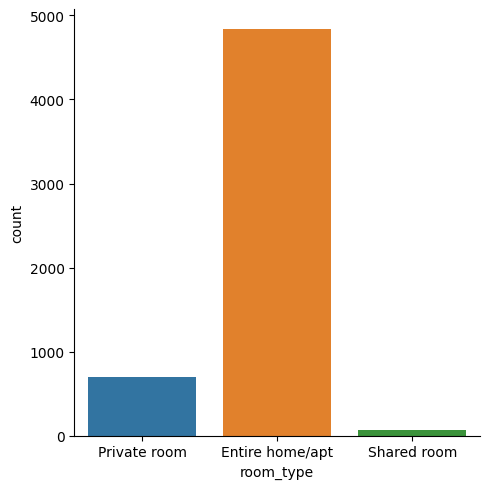

In [10]:
print("Number of room types :", len(data["room_type"].unique()))

print(data["room_type"].value_counts())
sns.catplot(x = "room_type", data = data, kind = "count")

Number of property types : 42
property_type
Entire rental unit                    2189
Entire home                           1550
Private room in home                   418
Entire condo                           405
Entire townhouse                       275
Entire guesthouse                      130
Private room in rental unit            101
Entire loft                             82
Entire serviced apartment               57
Private room in townhouse               55
Entire guest suite                      52
Shared room in home                     50
Room in boutique hotel                  38
Private room in condo                   34
Entire bungalow                         31
Room in hotel                           28
Shared room in rental unit              18
Tiny home                               14
Entire place                            12
Private room in guest suite             10
Camper/RV                               10
Entire cottage                           9
Private ro

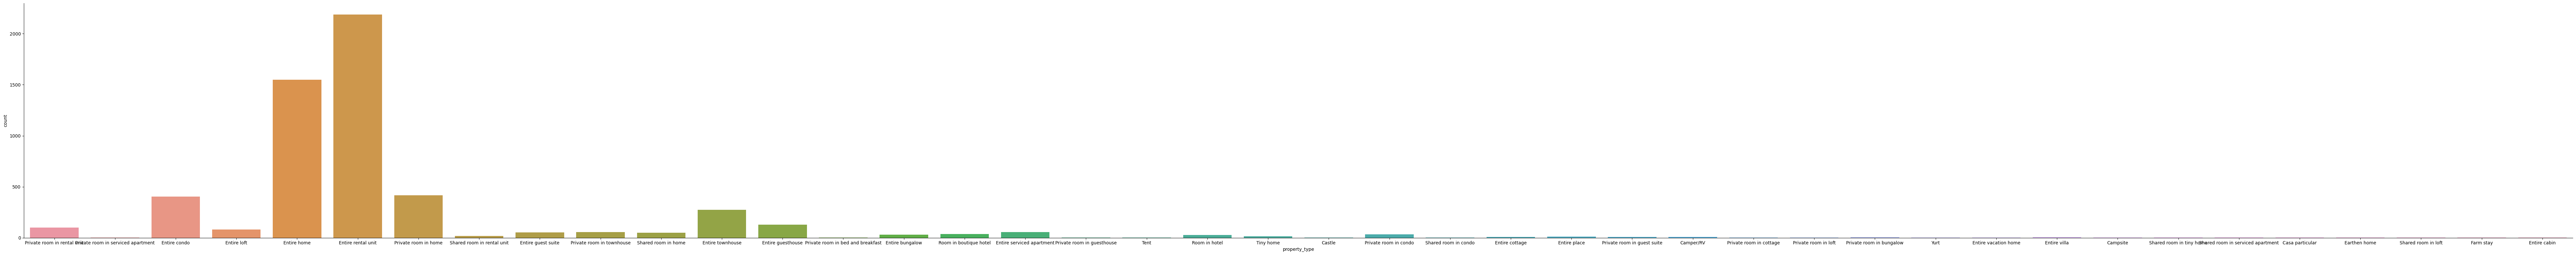

In [11]:
print("Number of property types :", len(data["property_type"].unique()))

print(data["property_type"].value_counts())
sns.catplot(x = "property_type", data = data, kind = "count", height = 8, aspect = 10)

In [12]:
roomProperty_DF = data.groupby(['property_type','room_type']).price.mean()
roomProperty_DF = roomProperty_DF.reset_index()
roomProperty_DF = roomProperty_DF.sort_values('price',ascending=[0])

In [13]:
roomProperty_DF.head()

,property_type,room_type,price
3,Castle,Entire home/apt,1357.000000
32,Room in hotel,Private room,1021.178571
31,Room in boutique hotel,Private room,816.368421
19,Farm stay,Entire home/apt,550.000000
17,Entire vacation home,Entire home/apt,506.666667


<Axes: xlabel='room_type', ylabel='property_type'>

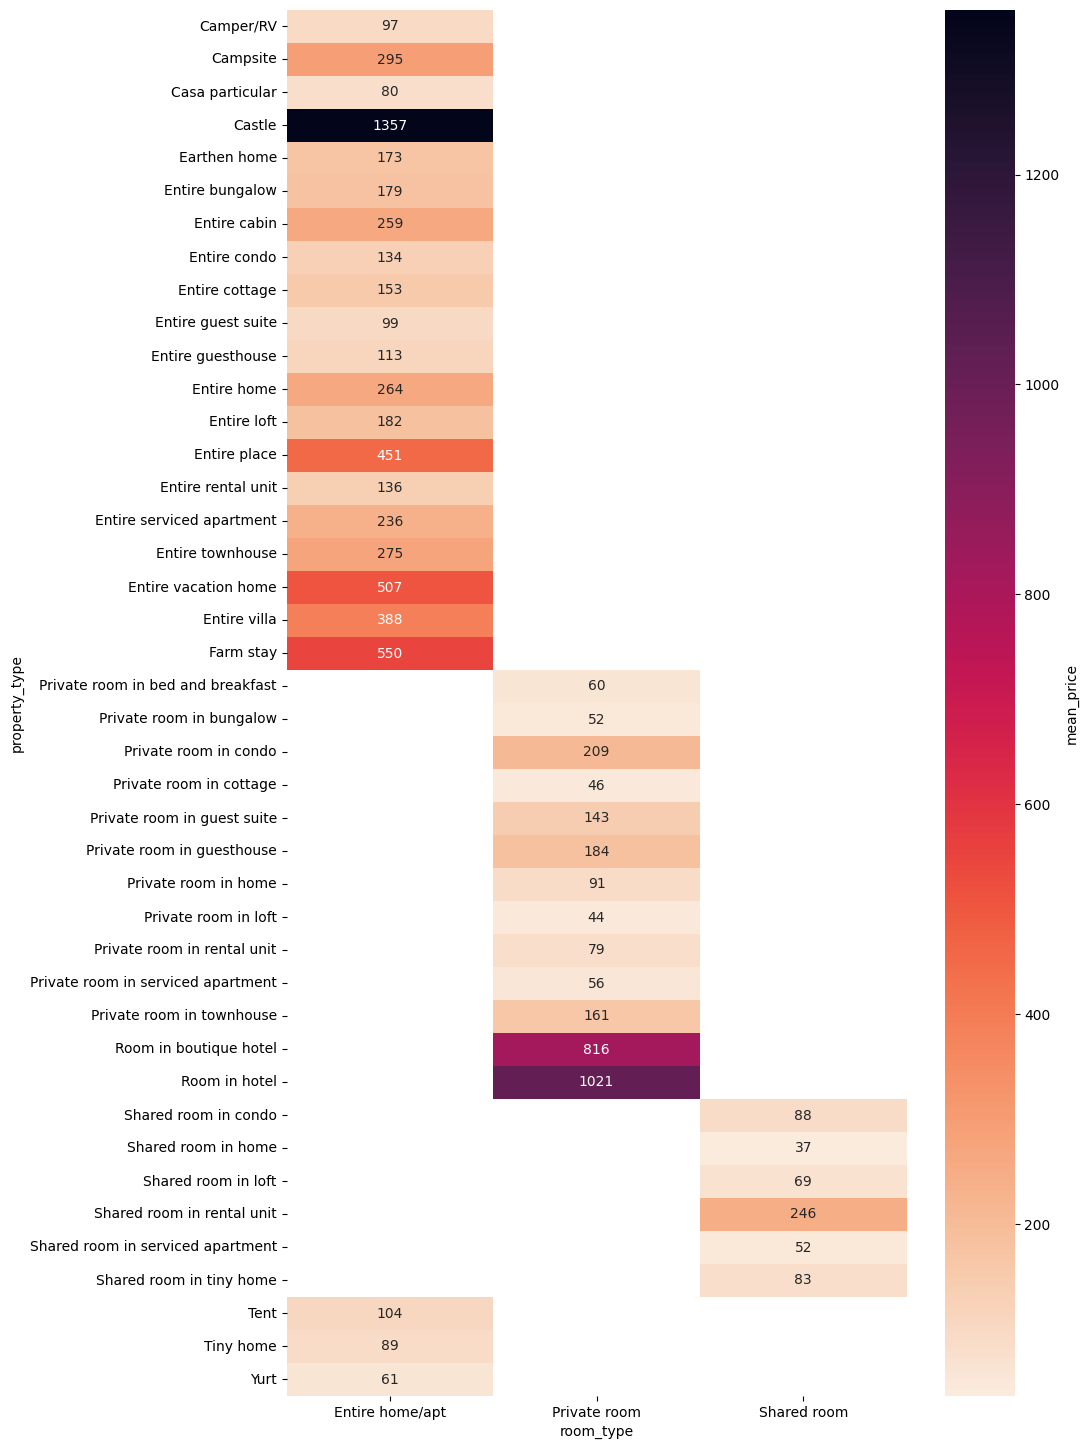

In [14]:
plt.figure(figsize = (10,18))
sns.heatmap(data.groupby(['property_type', 'room_type']).price.mean().unstack(), annot=True, fmt=".0f", cmap = sns.cm.rocket_r, cbar_kws={'label': 'mean_price'})

From the above heatmap, with lighter colour representing lower price and darker representing higher price, we can see that shared rooms have the lighest colour so they are cheapest. Private rooms have a slightly darker colour so they are in the middle, and entire houses are the darkest so they are the most expensive. 

It is also important to note that the highest number of listings which was house and apartments actually have very similar prices for each of the room_type category.

All of this tells us that the room_type and property_type both play a very important role in the final price of the listing.

### Anaylzing the listings based on the number of bedrooms.

<Axes: xlabel='bedrooms', ylabel='property_type'>

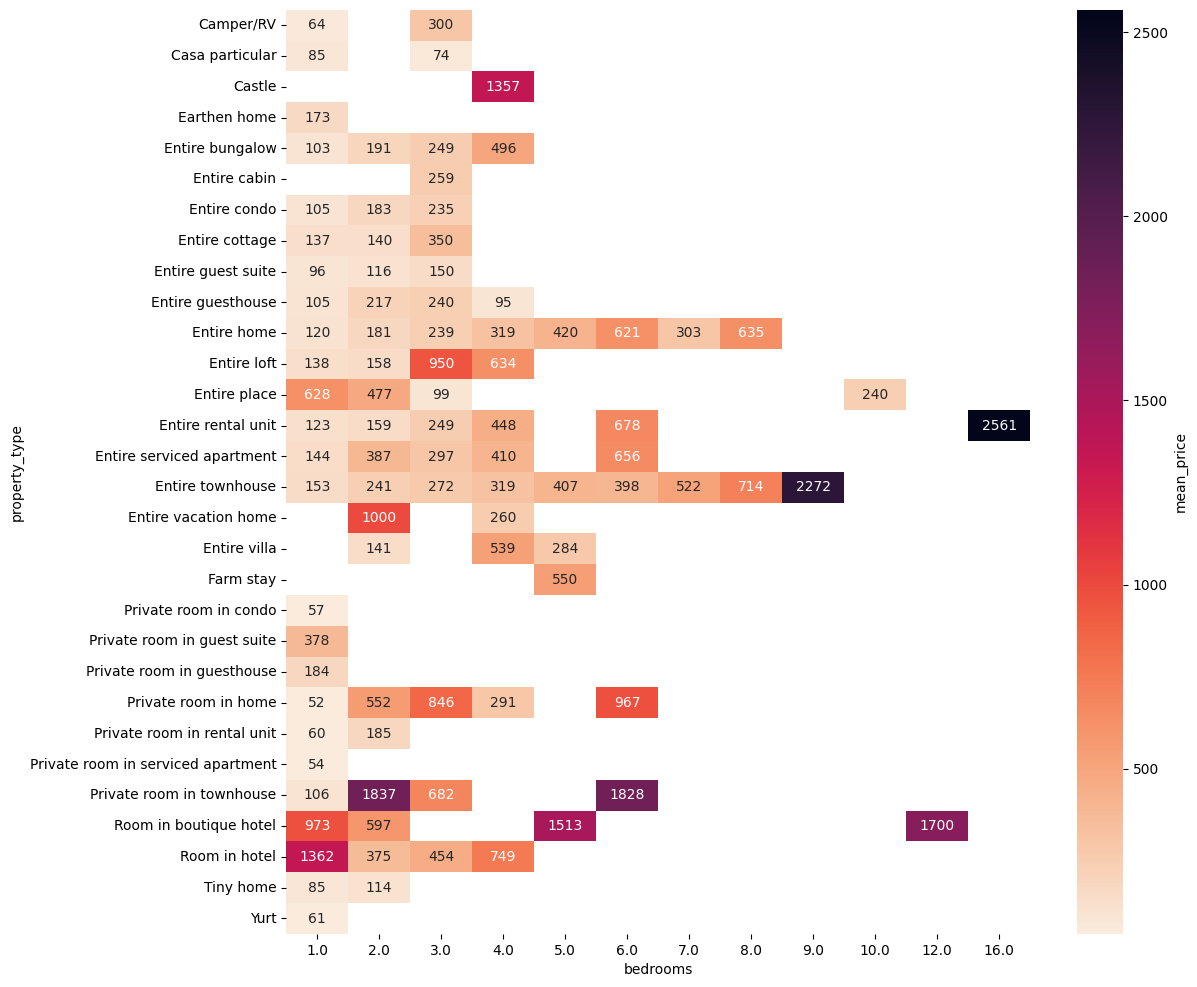

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(data.groupby(['property_type', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f", cmap = sns.cm.rocket_r, cbar_kws={'label': 'mean_price'})

From the above heatmap, we can see that unsurprisingly, price of listings increases with number of bedrooms.

### Analyzing neighbourhood with price of listing

<Axes: xlabel='property_type', ylabel='neighbourhood_cleansed'>

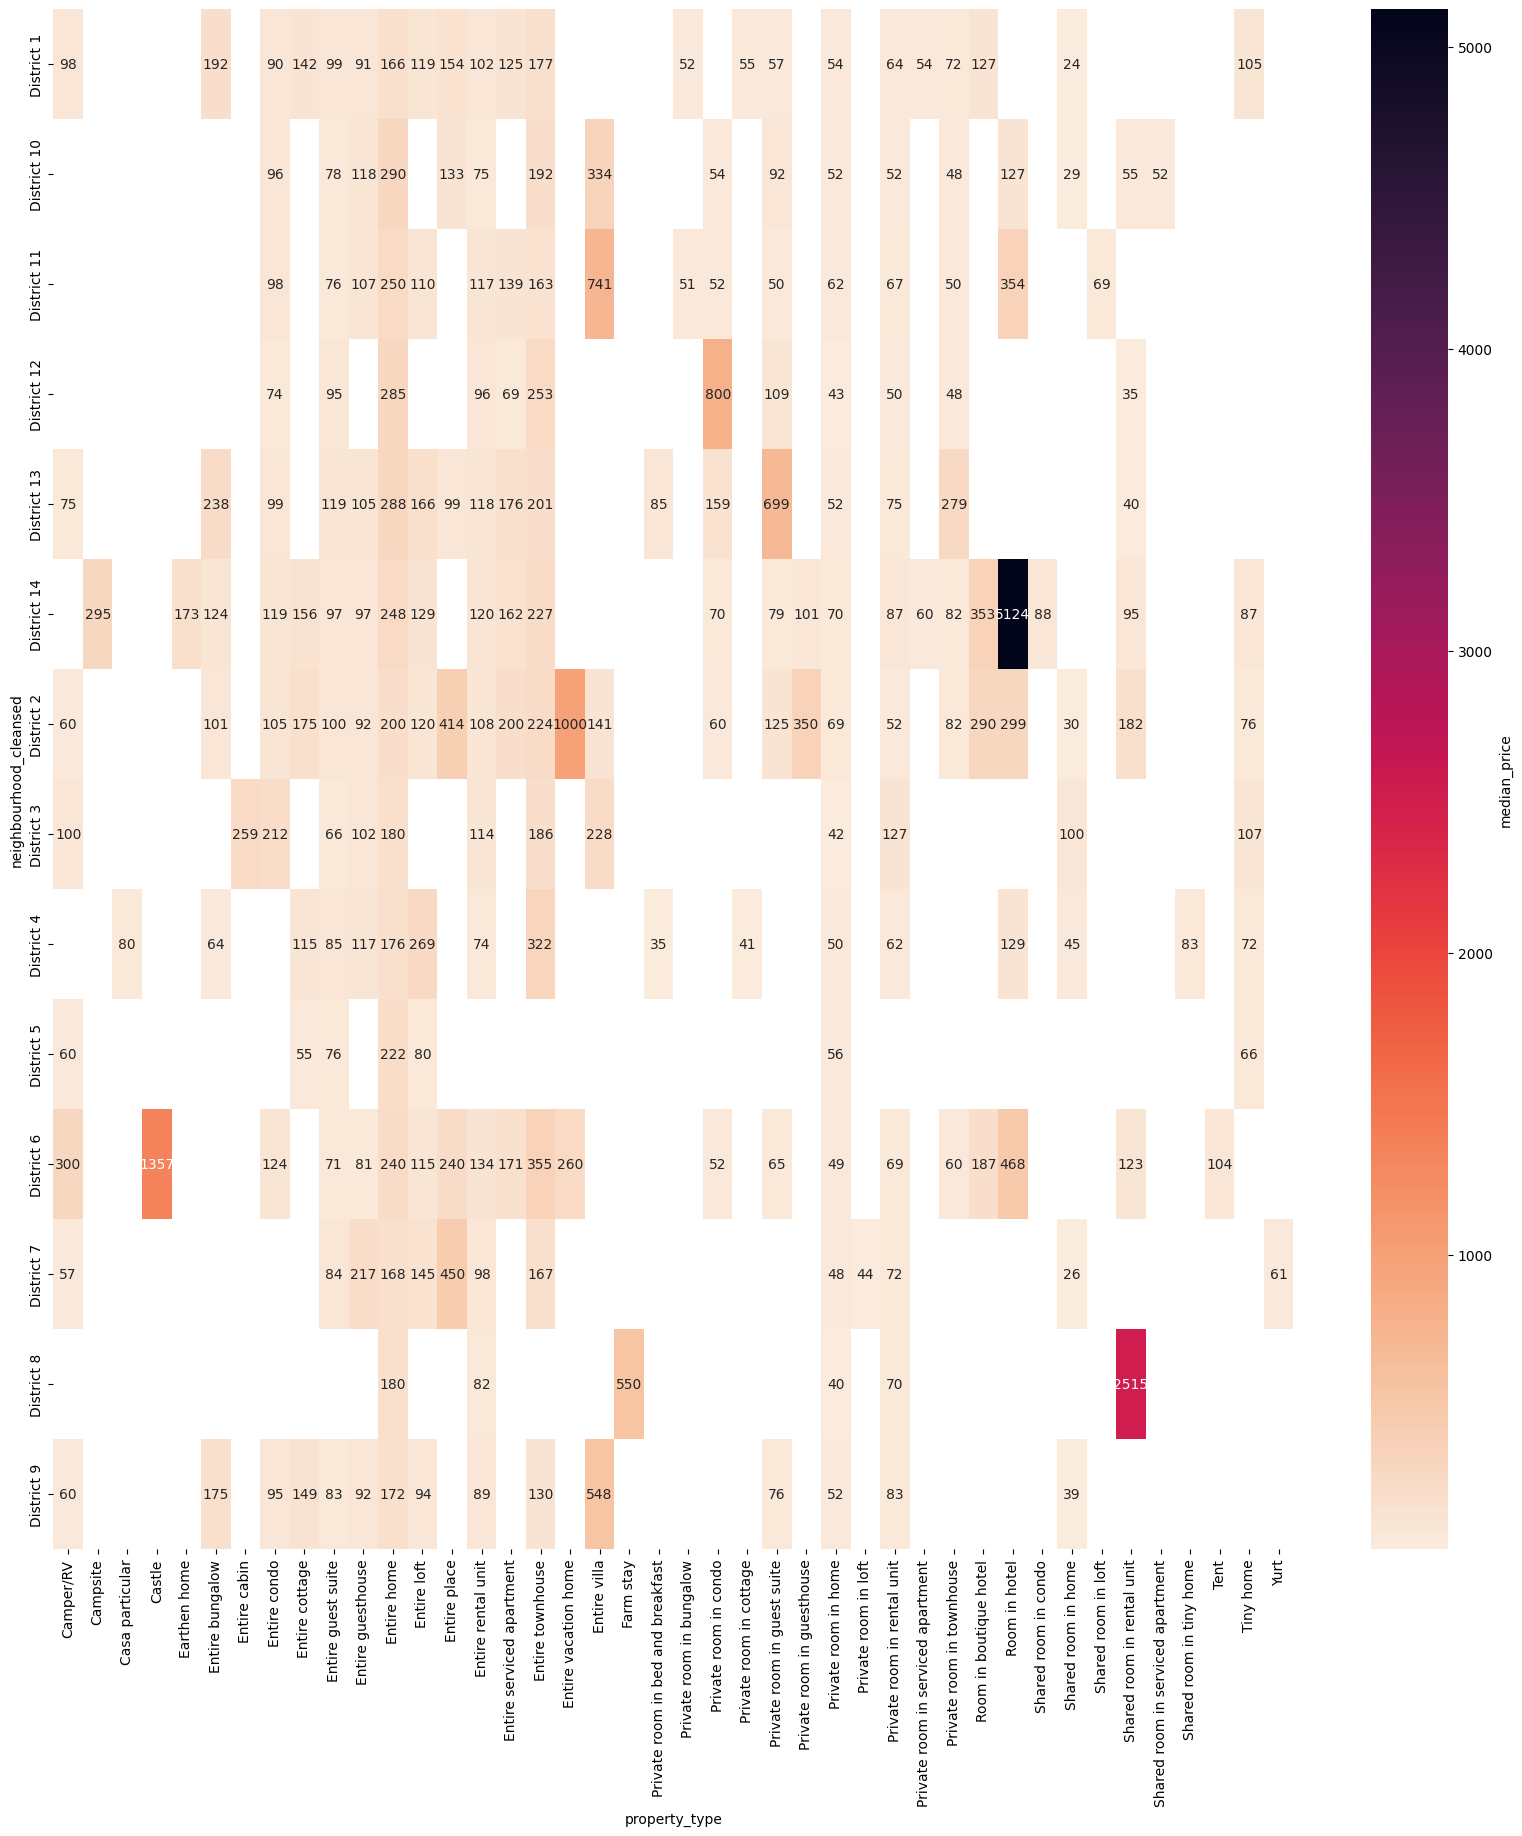

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(data.groupby([
        'neighbourhood_cleansed', 'property_type']).price.median().unstack(),annot=True, fmt=".0f", cmap = sns.cm.rocket_r, cbar_kws={'label': 'median_price'})

A heatmap was plotted to give a short and quick intuition of whether location plays a part in price of the listing. From the heatmap above, we can infer 2 things. First is that the **majority of listing types (Apartments & Houses) are listed in almost all neighbourhoods**. The second thing we can infer is that there are **some neighbourhood rows which tend to be darker than other neighbourhood rows** in the heatmap above. This could possibly mean location might have some influence in the price. So, we will analyze this further.

### Finding the number of listings for each neighbourhood and median price

In [17]:
home = data[(data.room_type == 'Entire home/apt')]
private = data[(data.room_type == 'Private room')]
shared = data[(data.room_type == 'Shared room')]

In [18]:
neighbourhood_DF=home.groupby('neighbourhood_cleansed').id.count()
neighbourhood_DF=neighbourhood_DF.reset_index()
neighbourhood_DF=neighbourhood_DF.rename(columns={'id':'Number_Of_Listings'})
neighbourhood_DF=neighbourhood_DF.sort_values('Number_Of_Listings',ascending=[0])
neighbourhood_DF

,neighbourhood_cleansed,Number_Of_Listings
6,District 2,1491
5,District 14,1321
0,District 1,483
10,District 6,239
2,District 11,222
4,District 13,222
13,District 9,170
11,District 7,158
3,District 12,157
1,District 10,152


In [19]:
neighbourhoodPrice_DF=home.groupby('neighbourhood_cleansed').price.median()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.reset_index()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.rename(columns={'price':'Median_Price'})
neighbourhoodPrice_DF=neighbourhoodPrice_DF.sort_values('Median_Price',ascending=[0])
neighbourhoodPrice_DF

,neighbourhood_cleansed,Median_Price
10,District 6,208.0
12,District 8,180.0
7,District 3,168.0
11,District 7,165.0
8,District 4,164.0
4,District 13,151.5
9,District 5,150.5
13,District 9,144.5
0,District 1,138.0
5,District 14,131.0


In [20]:
mergeDF=pd.merge(neighbourhood_DF,neighbourhoodPrice_DF,on='neighbourhood_cleansed')
mergeDF.head()

,neighbourhood_cleansed,Number_Of_Listings,Median_Price
0,District 2,1491,120.0
1,District 14,1321,131.0
2,District 1,483,138.0
3,District 6,239,208.0
4,District 11,222,124.5


In [21]:
import matplotlib

Text(0, 0.5, 'Number_Of_Listings')

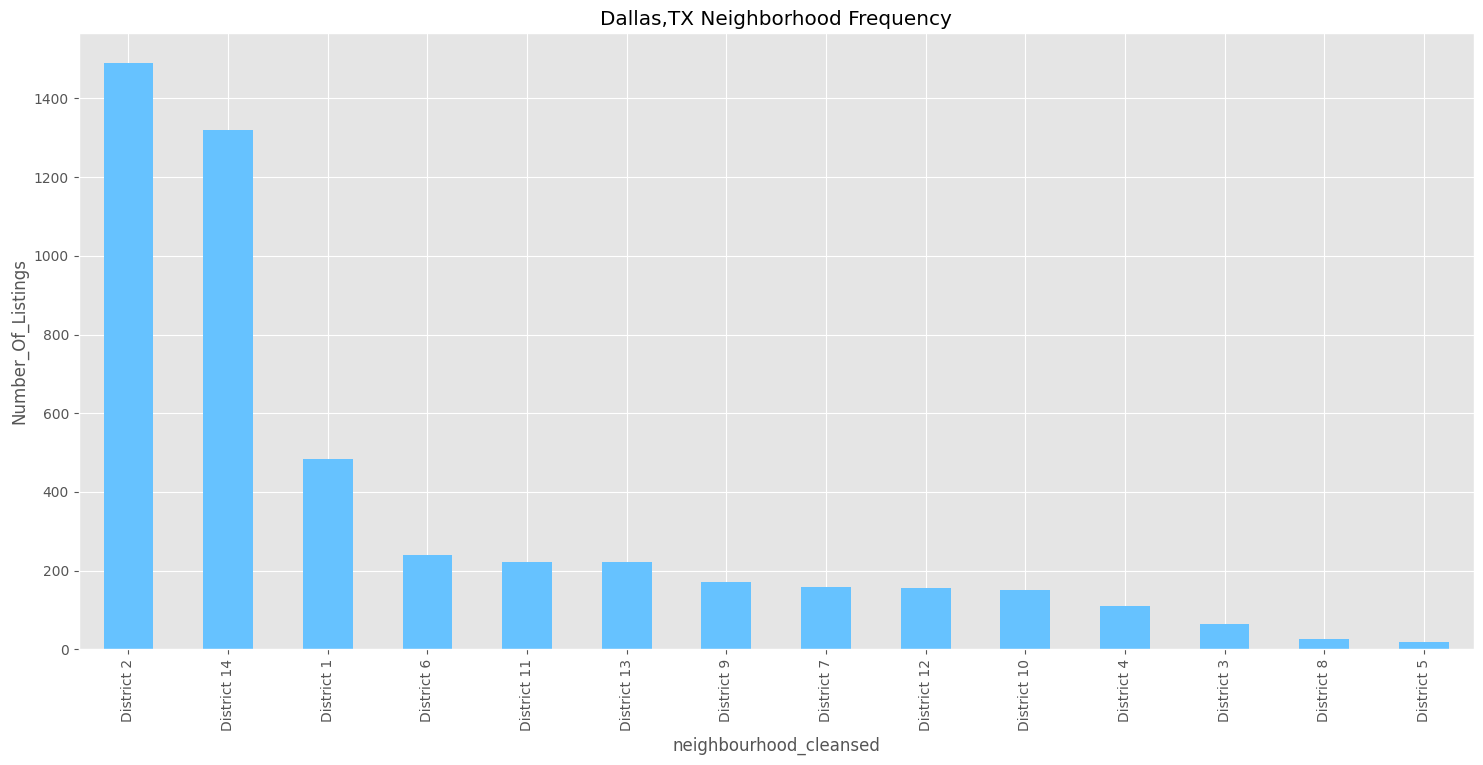

In [22]:
matplotlib.style.use('ggplot')

objects = neighbourhood_DF['neighbourhood_cleansed']
y_pos = neighbourhood_DF['Number_Of_Listings']

neighbourhood_DF.plot(kind='bar', 
           x='neighbourhood_cleansed',
           y='Number_Of_Listings',
           color = '#66c2ff', 
           figsize =(18,8), 
           title = 'Dallas,TX Neighborhood Frequency', 
           legend = False)

plt.ylabel('Number_Of_Listings')

Text(0, 0.5, 'Median Price')

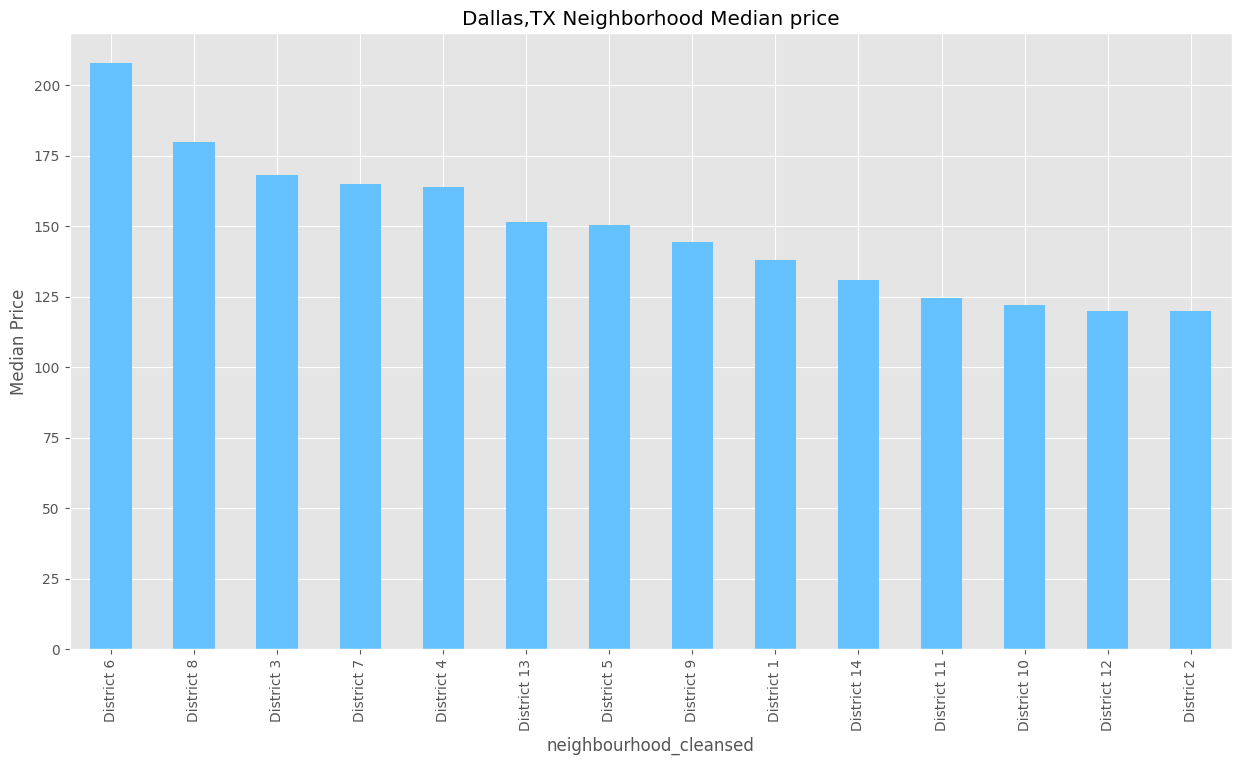

In [23]:
matplotlib.style.use('ggplot')

objects = neighbourhoodPrice_DF['neighbourhood_cleansed']
y_pos = neighbourhoodPrice_DF['Median_Price']

neighbourhoodPrice_DF.plot(kind='bar', 
           x='neighbourhood_cleansed',
           y='Median_Price',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'Dallas,TX Neighborhood Median price', 
           legend = False)

plt.ylabel('Median Price')

By analyzing the number of listings and prices for each neighborhood, we can get a clearer understanding of which neighbourhoods have a lot of expensive listings. Looking at the analysis done so far, we can see that certain neighbourhoods are indeed more 'expensive' than others.


### Analyzing if number of reviews a listing affects its price.

Text(0, 0.5, 'Number of reviews')

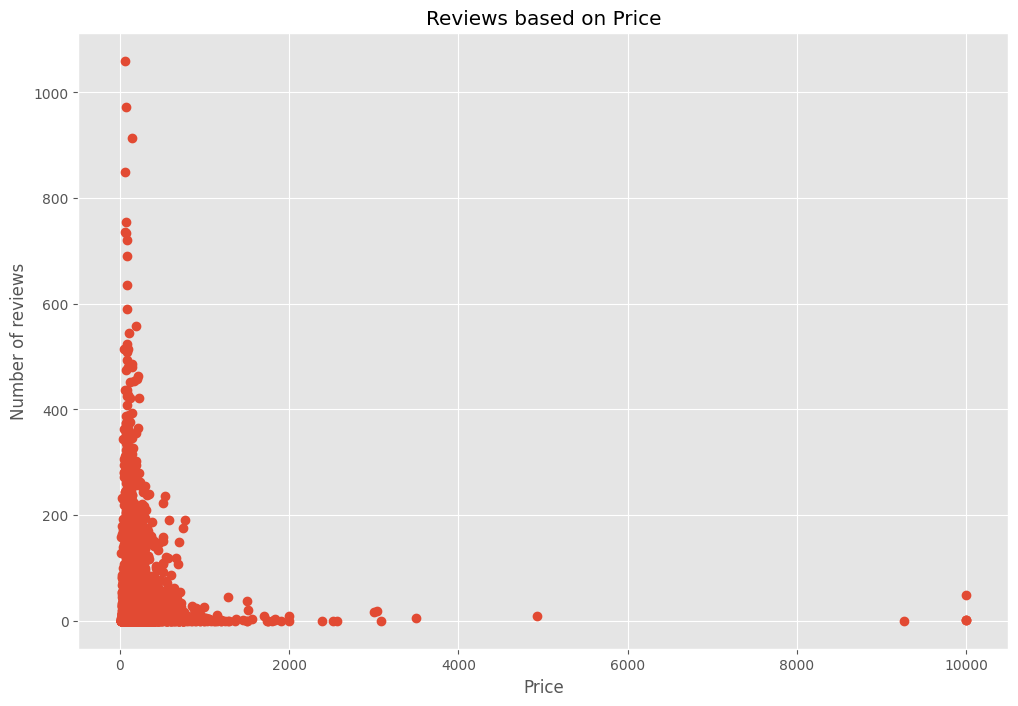

In [24]:
price_review = data[['number_of_reviews', 'price']].sort_values(by = 'price')

price_review.plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(12,8),
                  legend = False,
                  title = 'Reviews based on Price')

plt.xlabel("Price")
plt.ylabel("Number of reviews")

# 3. Preprocessing

### Outliers

Analyse standard deviation for attributes to check for outliers and using iqr method

In [25]:
data.describe()

,id,longitude,latitude,review_scores_rating,accommodates,bathrooms,bedrooms,beds,reviews_per_month,number_of_reviews,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
count,5.610000e+03,5610.000000,5610.000000,4639.000000,5610.000000,0.0,4754.000000,5558.000000,4639.000000,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000,5.610000e+03,5610.000000,5.610000e+03,5610.000000,5610.000000,5610.000000,5610.00000,5610.000000,5610.000000,5610.000000,5610.000000
mean,4.109356e+17,-96.793769,32.813364,4.719302,4.919964,NaN,2.008414,2.514574,1.994402,35.822816,184.847772,8.032086,534.775758,7.258467,9.454902,783.139037,2.680397e+06,8.759073,7.356574e+04,13.524599,33.738503,54.660606,224.38574,17.849198,17.084848,0.665775,0.098574
std,3.922463e+17,0.046868,0.064871,0.477577,3.376348,NaN,1.247397,1.964794,1.992657,70.622992,352.127549,18.064958,427.158872,17.398752,23.841401,438.618032,7.581670e+07,18.083916,2.058347e+06,11.228824,21.316584,31.557015,129.29910,40.005741,40.170890,2.349720,0.838383
min,7.768100e+05,-96.990370,32.627314,0.000000,1.000000,NaN,1.000000,1.000000,0.010000,0.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000
25%,4.505781e+07,-96.822005,32.778593,4.670000,2.000000,NaN,1.000000,1.000000,0.510000,2.000000,90.000000,1.000000,180.000000,1.000000,2.000000,365.000000,3.650000e+02,1.100000,3.650000e+02,0.000000,14.000000,32.250000,105.00000,1.000000,1.000000,0.000000,0.000000
50%,5.772361e+17,-96.794825,32.803250,4.860000,4.000000,NaN,2.000000,2.000000,1.410000,11.000000,125.000000,2.000000,365.000000,2.000000,3.000000,1125.000000,1.125000e+03,2.000000,1.125000e+03,14.000000,39.000000,64.000000,266.00000,3.000000,2.000000,0.000000,0.000000
75%,7.934285e+17,-96.770381,32.827615,5.000000,6.000000,NaN,3.000000,3.000000,2.880000,38.000000,199.000000,4.000000,1125.000000,3.000000,7.000000,1125.000000,1.125000e+03,6.000000,1.125000e+03,24.000000,53.000000,81.000000,344.00000,13.000000,10.000000,0.000000,0.000000
max,9.356601e+17,-96.481240,33.015210,5.000000,16.000000,NaN,16.000000,22.000000,21.200000,1060.000000,9999.000000,365.000000,1125.000000,365.000000,1100.000000,1125.000000,2.147484e+09,365.000000,5.830281e+07,30.000000,60.000000,90.000000,365.00000,198.000000,198.000000,19.000000,10.000000


<Axes: >

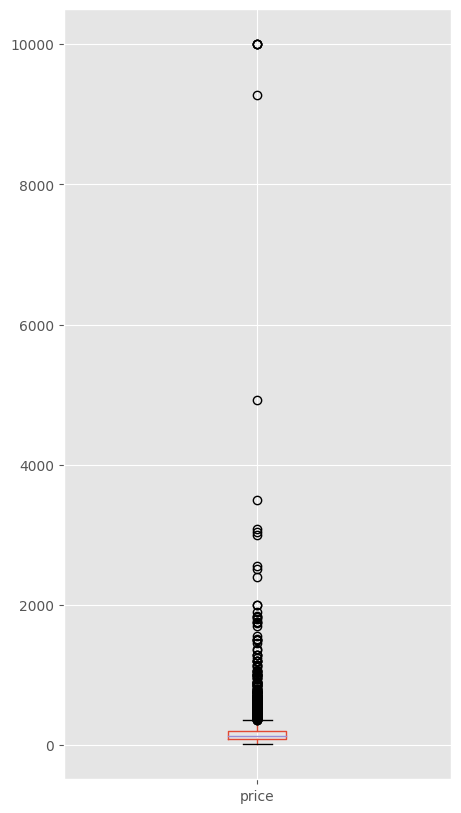

In [26]:
plt.figure(figsize=(5, 10))

column_name = 'price'
data.boxplot(column='price')

In [27]:
def iqr(data, column_name):
    IQR = data[column_name].quantile(0.75) - data[column_name].quantile(0.25)
    lower_fence = data[column_name].quantile(0.25) - (IQR * 3)
    upper_fence = data[column_name].quantile(0.75) + (IQR * 3)
    return lower_fence, upper_fence

In [28]:
lower_price, upper_price = iqr(data, 'price')

In [29]:
data["price"].clip(lower=lower_price, upper=upper_price, inplace=True)

### Choosing Features for Modeling

Based on the work done during Exploratory Analysis, we have concluded that the predictor variables that might have the greatest impact on price are:
- Room Type
- Property Type
- Number of Bedrooms
- Neighbourhood
- Accommodates
- beds
- Amenities
- number of reviews

In [30]:
newdf = data[['neighbourhood_cleansed', 'number_of_reviews','property_type','room_type','accommodates',
        'bedrooms','beds', 'amenities','price']]
newdf.info()
# ,'room_type'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610 entries, 0 to 5609
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  5610 non-null   object 
 1   number_of_reviews       5610 non-null   int64  
 2   property_type           5610 non-null   object 
 3   room_type               5610 non-null   object 
 4   accommodates            5610 non-null   int64  
 5   bedrooms                4754 non-null   float64
 6   beds                    5558 non-null   float64
 7   amenities               5610 non-null   object 
 8   price                   5610 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 394.6+ KB


'number_of_reviews'
'reviews_per_month'

### Feature Engineering

Creating a set of all possible amenities:

In [31]:
amenities_list = list(newdf.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)

Creating column variables for each of the different amenities and adding them into the original dataframe:


In [32]:
newdf.loc[newdf['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
newdf.loc[newdf['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
newdf.loc[newdf['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
newdf.loc[newdf['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
newdf.loc[newdf['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
newdf.loc[newdf['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
newdf.loc[newdf['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
newdf.loc[newdf['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
newdf.loc[newdf['amenities'].str.contains('TV'), 'tv'] = 1
newdf.loc[newdf['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
newdf.loc[newdf['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
newdf.loc[newdf['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
newdf.loc[newdf['amenities'].str.contains('Elevator'), 'elevator'] = 1
newdf.loc[newdf['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
newdf.loc[newdf['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
newdf.loc[newdf['amenities'].str.contains('parking'), 'parking'] = 1
newdf.loc[newdf['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
newdf.loc[newdf['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
newdf.loc[newdf['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
newdf.loc[newdf['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
newdf.loc[newdf['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
newdf.loc[newdf['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
newdf.loc[newdf['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
newdf.loc[newdf['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
newdf.loc[newdf['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
newdf.loc[newdf['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
newdf.loc[newdf['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
newdf.loc[newdf['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

Replacing nulls with zeros for new columns and dropping the original amenities variable:


In [33]:
newdf.drop('amenities', axis=1, inplace=True)

In [34]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610 entries, 0 to 5609
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  5610 non-null   object 
 1   number_of_reviews       5610 non-null   int64  
 2   property_type           5610 non-null   object 
 3   room_type               5610 non-null   object 
 4   accommodates            5610 non-null   int64  
 5   bedrooms                4754 non-null   float64
 6   beds                    5558 non-null   float64
 7   price                   5610 non-null   float64
 8   check_in_24h            0 non-null      float64
 9   air_conditioning        5448 non-null   float64
 10  high_end_electronics    1333 non-null   float64
 11  bbq                     2447 non-null   float64
 12  balcony                 829 non-null    float64
 13  nature_and_views        105 non-null    float64
 14  bed_linen               4195 non-null   

Removing the amenities which have all NULL values for all listings:


In [35]:
newdf = newdf.dropna(axis=1, how='all')
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610 entries, 0 to 5609
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  5610 non-null   object 
 1   number_of_reviews       5610 non-null   int64  
 2   property_type           5610 non-null   object 
 3   room_type               5610 non-null   object 
 4   accommodates            5610 non-null   int64  
 5   bedrooms                4754 non-null   float64
 6   beds                    5558 non-null   float64
 7   price                   5610 non-null   float64
 8   air_conditioning        5448 non-null   float64
 9   high_end_electronics    1333 non-null   float64
 10  bbq                     2447 non-null   float64
 11  balcony                 829 non-null    float64
 12  nature_and_views        105 non-null    float64
 13  bed_linen               4195 non-null   float64
 14  breakfast               271 non-null    

### Handling missing values

In [36]:
newdf['beds'] = newdf['beds'].fillna(1)
newdf['bedrooms'] = newdf['bedrooms'].fillna(0)

newdf = newdf.fillna(0)
newdf.isnull().sum()

neighbourhood_cleansed    0
number_of_reviews         0
property_type             0
room_type                 0
accommodates              0
bedrooms                  0
beds                      0
price                     0
air_conditioning          0
high_end_electronics      0
bbq                       0
balcony                   0
nature_and_views          0
bed_linen                 0
breakfast                 0
tv                        0
coffee_machine            0
cooking_basics            0
white_goods               0
elevator                  0
gym                       0
child_friendly            0
parking                   0
outdoor_space             0
host_greeting             0
hot_tub_sauna_or_pool     0
internet                  0
long_term_stays           0
pets_allowed              0
private_entrance          0
secure                    0
self_check_in             0
smoking_allowed           0
dtype: int64

In [37]:
newdf = pd.get_dummies(newdf, columns=['room_type','property_type', 'neighbourhood_cleansed'])

#renaming some categories to remove '/' and blank spaces
newdf = newdf.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt'})
newdf =newdf.rename(columns={'room_type_Private room': 'room_type_Private_room'})
newdf =newdf.rename(columns={'room_type_Shared room': 'room_type_Shared_room'})
newdf =newdf.rename(columns={'property_type_Bed & Breakfast': 'property_type_Bed_and_Breakfast'})

newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610 entries, 0 to 5609
Data columns (total 89 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   number_of_reviews                                 5610 non-null   int64  
 1   accommodates                                      5610 non-null   int64  
 2   bedrooms                                          5610 non-null   float64
 3   beds                                              5610 non-null   float64
 4   price                                             5610 non-null   float64
 5   air_conditioning                                  5610 non-null   float64
 6   high_end_electronics                              5610 non-null   float64
 7   bbq                                               5610 non-null   float64
 8   balcony                                           5610 non-null   float64
 9   nature_and_views   

# 4. Algorithm Application

### Spliting data into train and test

In [38]:
X = newdf.drop(["price"], axis=1)
y = newdf.price

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Linear Regression

Text(0, 0.5, 'y_test')

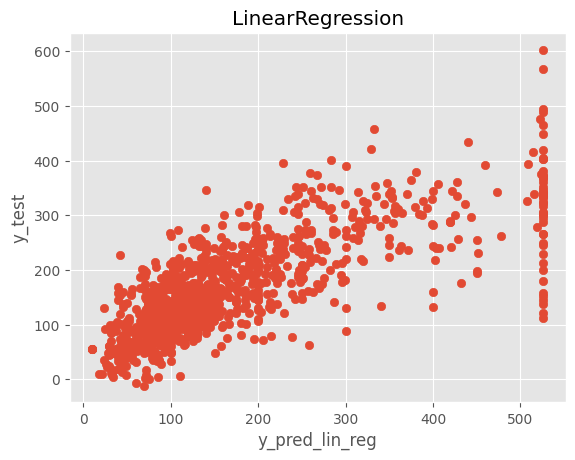

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression().fit(X_train, y_train)

test_score_lin_reg = lin_reg.score(X_test, y_test)
train_score_lin_reg = lin_reg.score(X_train, y_train)

y_pred_lin_reg = lin_reg.predict(X_test)

rmse_lin_reg = np.sqrt(mean_squared_error(y_test, y_pred_lin_reg))

plt.scatter(y_test, y_pred_lin_reg)
plt.title('LinearRegression')
plt.xlabel('y_pred_lin_reg')
plt.ylabel('y_test')

### Ridge Regression

Text(0, 0.5, 'y_test')

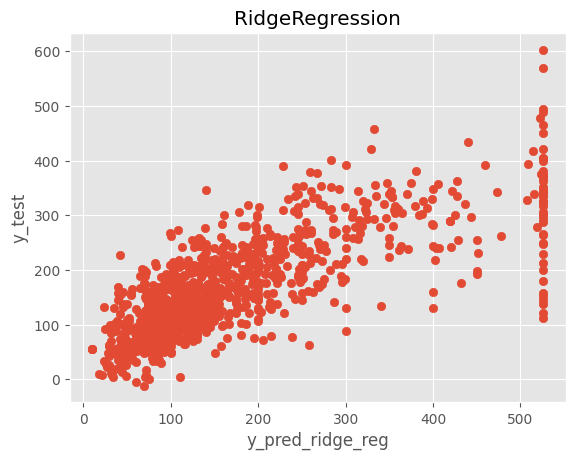

In [41]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0).fit(X_train, y_train)

test_score_ridge_reg = ridge_reg.score(X_test, y_test)
train_score_ridge_reg = ridge_reg.score(X_train, y_train)

y_pred_ridge_reg = ridge_reg.predict(X_test)

rmse_ridge_reg = np.sqrt(mean_squared_error(y_test, y_pred_ridge_reg))

plt.scatter(y_test, y_pred_ridge_reg)
plt.title('RidgeRegression')
plt.xlabel('y_pred_ridge_reg')
plt.ylabel('y_test')

### Lasso Regression

Text(0, 0.5, 'y_test')

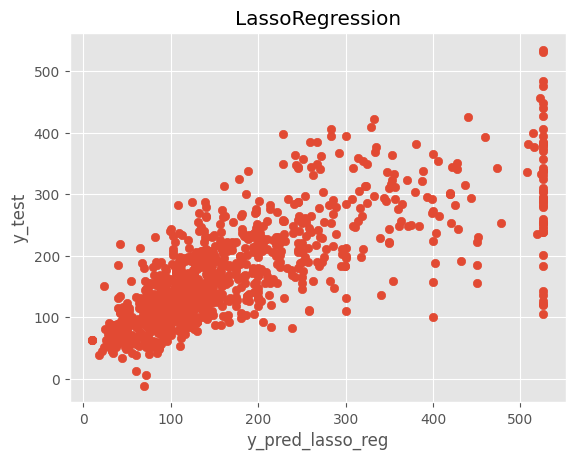

In [42]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1.0).fit(X_train, y_train)

test_score_lasso_reg = lasso_reg.score(X_test, y_test)
train_score_lasso_reg = lasso_reg.score(X_train, y_train)

y_pred_lasso_reg = lasso_reg.predict(X_test)

rmse_lasso_reg = np.sqrt(mean_squared_error(y_test, y_pred_lasso_reg))

plt.scatter(y_test, y_pred_lasso_reg)
plt.title('LassoRegression')
plt.xlabel('y_pred_lasso_reg')
plt.ylabel('y_test')

### Decision Tree Regression

Text(0, 0.5, 'y_test')

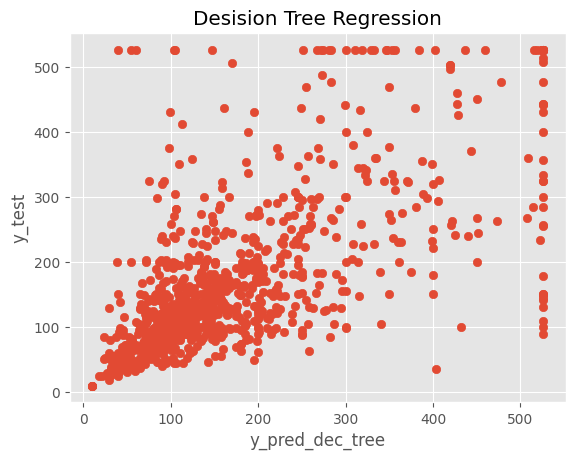

In [43]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor().fit(X_train, y_train)

test_score_dec_tree = dec_tree.score(X_test, y_test)
train_score_dec_tree = dec_tree.score(X_train, y_train)

y_pred_dec_tree = dec_tree.predict(X_test)

rmse_dec_tree = np.sqrt(mean_squared_error(y_test, y_pred_dec_tree))

plt.scatter(y_test, y_pred_dec_tree)
plt.title('Desision Tree Regression')
plt.xlabel('y_pred_dec_tree')
plt.ylabel('y_test')

### Random Forest Regression

Text(0, 0.5, 'y_test')

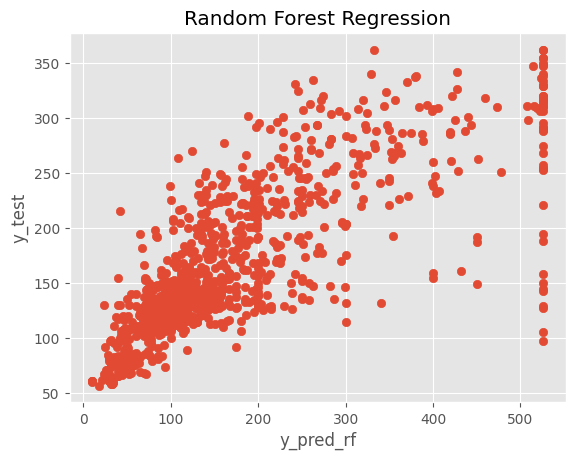

In [44]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000, max_depth=40,min_samples_split = 50,
                           max_leaf_nodes = 70,max_features = 5).fit(X_train,y_train)

test_score_rf = rf.score(X_test, y_test)
train_score_rf = rf.score(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

plt.scatter(y_test, y_pred_rf)
plt.title('Random Forest Regression')
plt.xlabel('y_pred_rf')
plt.ylabel('y_test')

### Gradient Boosting Regression

Text(0, 0.5, 'y_test')

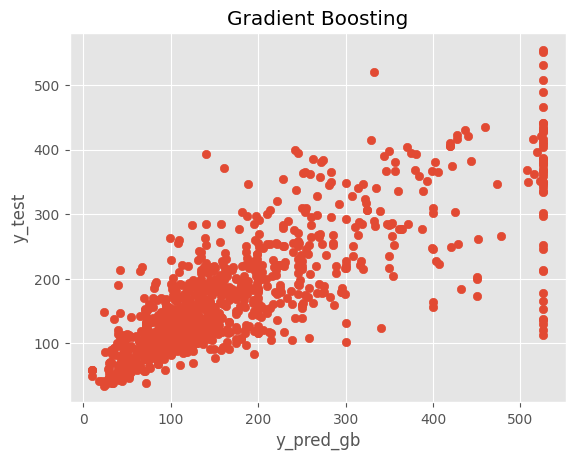

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42).fit(X_train, y_train)

test_score_gb = gb.score(X_test, y_test)
train_score_gb = gb.score(X_train, y_train)

y_pred_gb = gb.predict(X_test)

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

plt.scatter(y_test, y_pred_gb)
plt.title('Gradient Boosting')
plt.xlabel('y_pred_gb')
plt.ylabel('y_test')

# 5. Model Selection

### Model Evaluation

In [46]:
rmse_values = {
    'Linear Regression': rmse_lin_reg,
    'Ridge Regression': rmse_ridge_reg,
    'Lasso Regression': rmse_lasso_reg,
    'Decision Tree Regression': rmse_dec_tree,
    'Random Forest Regression': rmse_rf,    
    'Gradient Boosting Regression': rmse_gb
}

best_model = min(rmse_values, key=rmse_values.get)

print("-RMSE Values:")
for model, rmse in rmse_values.items():
    print(f"{model}: {rmse}")

print(f"\n>The model with the lowest RMSE is: {best_model} with RMSE of {rmse_values[best_model]}")

print()

test_score_values = {
    'Linear Regression': test_score_lin_reg,
    'Ridge Regression': test_score_ridge_reg,
    'Lasso Regression': test_score_lasso_reg,
    'Decision Tree Regression': test_score_dec_tree,
    'Random Forest Regression': test_score_rf,    
    'Gradient Boosting Regression': test_score_gb
}

best_test_score = max(test_score_values, key=test_score_values.get)

print("-Test Score Values:")
for model, test_score in test_score_values.items():
    print(f"{model}: {test_score}")

print(f"\n>The model with the highest Test Score is: {best_test_score} with Test Score of {test_score_values[best_test_score]}")

print()

train_score_values = {
    'Linear Regression': train_score_lin_reg,
    'Ridge Regression': train_score_ridge_reg,
    'Lasso Regression': train_score_lasso_reg,
    'Decision Tree Regression': train_score_dec_tree,
    'Random Forest Regression': train_score_rf,    
    'Gradient Boosting Regression': train_score_gb
}

best_train_score = max(train_score_values, key=train_score_values.get)

print("-Train Score Values:")
for model, train_score in train_score_values.items():
    print(f"{model}: {train_score}")

print(f"\n>The model with the highest Train Score is: {best_train_score} with Train Score of {train_score_values[best_train_score]}")

-RMSE Values:
Linear Regression: 76.40406990459967
Ridge Regression: 76.3236456824055
Lasso Regression: 77.1995938725223
Decision Tree Regression: 91.14252326733218
Random Forest Regression: 78.4816265721768
Gradient Boosting Regression: 70.99168461104524

>The model with the lowest RMSE is: Gradient Boosting Regression with RMSE of 70.99168461104524

-Test Score Values:
Linear Regression: 0.5846817473569295
Ridge Regression: 0.585555629282401
Lasso Regression: 0.5759880828783406
Decision Tree Regression: 0.4089963987915751
Random Forest Regression: 0.5617882457964554
Gradient Boosting Regression: 0.641439045274232

>The model with the highest Test Score is: Gradient Boosting Regression with Test Score of 0.641439045274232

-Train Score Values:
Linear Regression: 0.560139810136383
Ridge Regression: 0.5596773651475886
Lasso Regression: 0.5192026887021353
Decision Tree Regression: 0.9982306596530767
Random Forest Regression: 0.5627268017172431
Gradient Boosting Regression: 0.654788996221

### Decision Tree Regression Bagging


Text(0, 0.5, 'y_test')

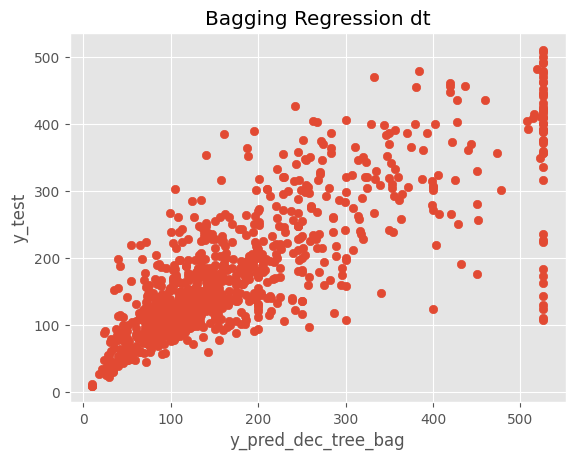

In [47]:
from sklearn.ensemble import BaggingRegressor


dec_tree_bag = BaggingRegressor(dec_tree, n_estimators=500, random_state=42)

dec_tree_bag.fit(X_train, y_train)

y_pred_dec_tree_bag = dec_tree_bag.predict(X_test)

test_score_dec_tree_bag = dec_tree_bag.score(X_test, y_test)
train_score_dec_tree_bag = dec_tree_bag.score(X_train, y_train)

rmse_dec_tree_bag = np.sqrt(mean_squared_error(y_test, y_pred_dec_tree_bag))

plt.scatter(y_test, y_pred_dec_tree_bag)
plt.title('Bagging Regression dt')
plt.xlabel('y_pred_dec_tree_bag')
plt.ylabel('y_test')

In [48]:
dt_bag_scores = {
    'RMSE': rmse_dec_tree_bag,
    'Test Score': test_score_dec_tree_bag,
    'Train Score': train_score_dec_tree_bag,
}

print('Decision Tree Regression Bagging Scores:')
for metric, score in dt_bag_scores.items():
    print(f"{metric}: {score}")

Decision Tree Regression Bagging Scores:
RMSE: 68.47245325286325
Test Score: 0.6664355123778923
Train Score: 0.9437775403249399


# 6. Hyperparameter Tuning

### Grid Search cross-validation for Gradient Bossting Regression

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [53]:
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [54]:
print("Best hyperparameters:", grid_search.best_params_)

print("Best root mean squared error:", np.sqrt(-grid_search.best_score_))

Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Best root mean squared error: 71.9900443995514
